In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/body fat/dataset/bodyfat.csv'  # Update with your actual path
data = pd.read_csv(file_path)
data.head()  # Display the first few rows of the dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Missing values in each column:
 Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Summary statistics:
           Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

        

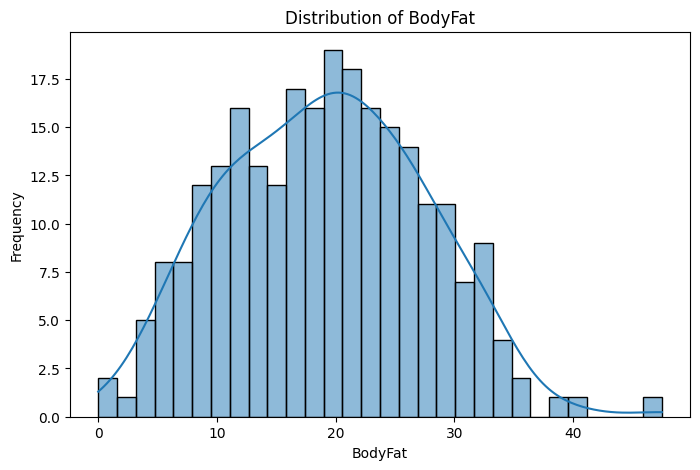

In [ ]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", data.describe())

# Data types of each column
print("\nData types:\n", data.dtypes)

# Visualize the distribution of the target variable 'BodyFat'
plt.figure(figsize=(8, 5))
sns.histplot(data['BodyFat'], bins=30, kde=True)
plt.title('Distribution of BodyFat')
plt.xlabel('BodyFat')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
          'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']]
y = data['BodyFat']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Linear Regression**

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



Model Coefficients: [-4.04681935e+02  1.85737292e-02  2.22537733e-02 -1.67007588e-02
 -1.03507771e-02  9.81733452e-03  2.13678809e-02  2.24941934e-02
 -2.46217725e-02 -2.88915360e-02 -1.19004080e-01 -4.82572806e-02
  1.21310225e-02 -1.09273164e-02]
Model Intercept: 444.62029276586384


Mean Squared Error: 0.38031220947726835
R^2 Score: 0.9918244198502368


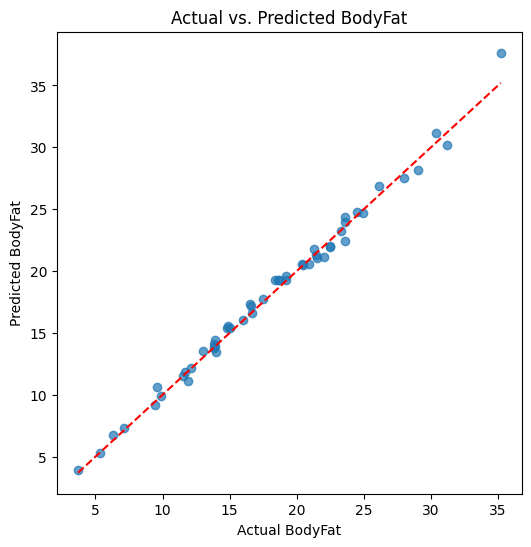

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual BodyFat')
plt.ylabel('Predicted BodyFat')
plt.title('Actual vs. Predicted BodyFat')
plt.show()


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Define the features (X) and target (y)
X = data.drop(columns=['BodyFat'])  # Features (excluding the target variable)
y = data['BodyFat']  # Target variable


In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialize the Decision Tree Regressor

dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:

# Predict on the test set
y_pred = dt_model.predict(X_test)


In [ ]:

# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 1.97
R^2 Score: 0.96


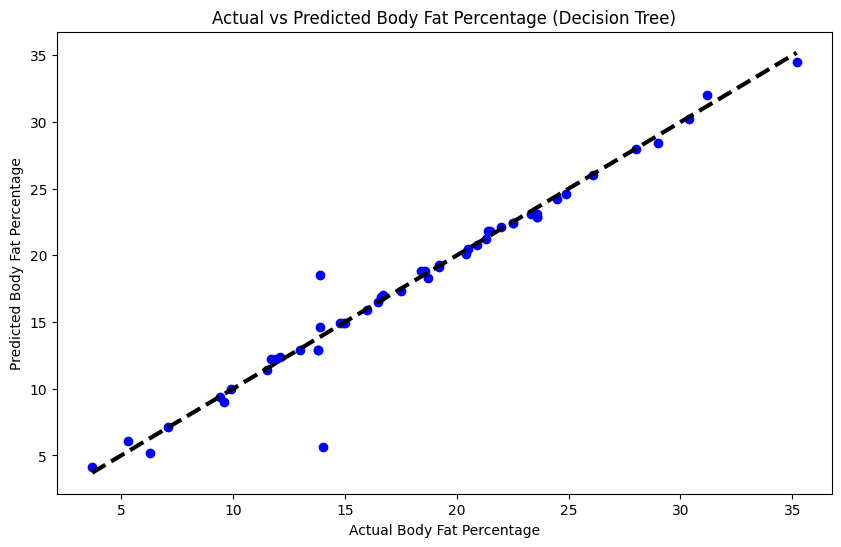

In [ ]:

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (Decision Tree)')
plt.show()


**Support Vector Regressor**

In [ ]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:


# Initialize the Support Vector Regressor with a linear kernel
svr_model = SVR(kernel='linear')

# Train the model
svr_model.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [ ]:

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_scaled)


In [ ]:

# Calculate Mean Squared Error (MSE) and R^2 Score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (SVR): {mse_svr:.2f}")
print(f"R^2 Score (SVR): {r2_svr:.2f}")


Mean Squared Error (SVR): 0.02
R^2 Score (SVR): 1.00


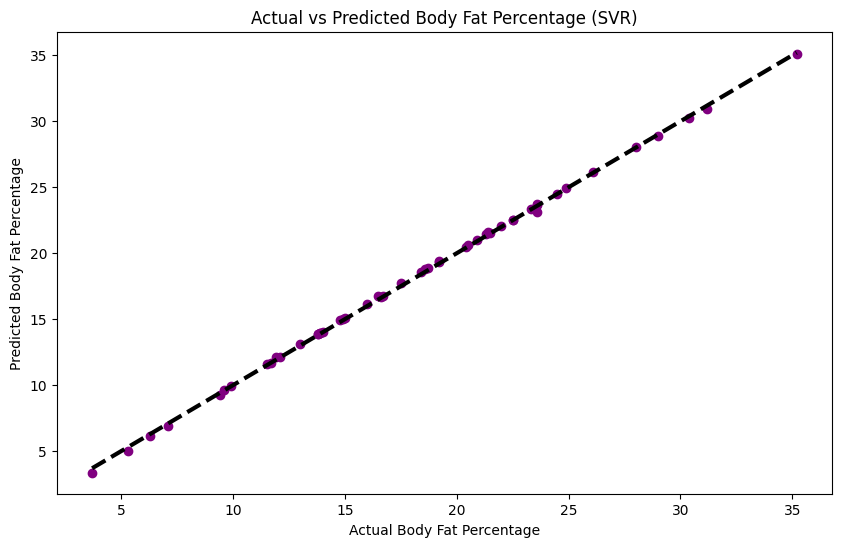

In [ ]:


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (SVR)')
plt.show()


**Lasso Regressor**

In [ ]:


from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize Lasso regression model with alpha (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha for stronger or weaker regularization

# Train the model
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [ ]:


# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)


In [ ]:


# Calculate Mean Squared Error (MSE) and R^2 Score
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error (Lasso): {mse_lasso:.2f}")
print(f"R^2 Score (Lasso): {r2_lasso:.2f}")


Mean Squared Error (Lasso): 0.26
R^2 Score (Lasso): 0.99


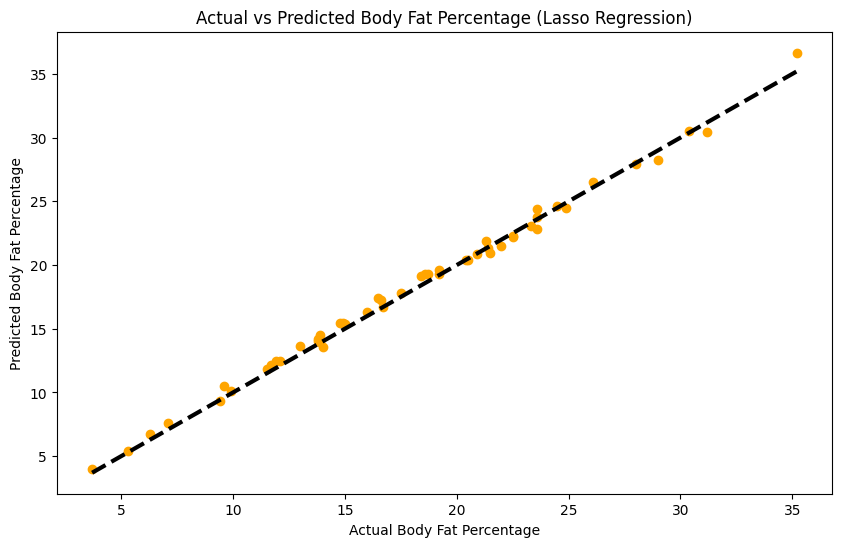

In [ ]:


import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (Lasso Regression)')
plt.show()


**Random Forest Regressor**





In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:


# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [ ]:


# Calculate Mean Squared Error (MSE) and R^2 Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")
print(f"R^2 Score (Random Forest): {r2_rf:.2f}")


Mean Squared Error (Random Forest): 0.05
R^2 Score (Random Forest): 1.00


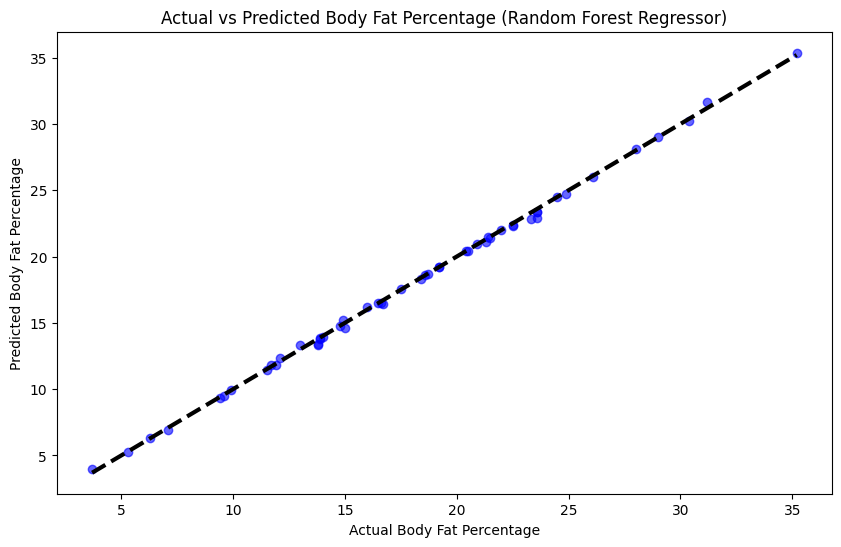

In [ ]:


import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (Random Forest Regressor)')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/body fat/dataset/bodyfat.csv'  # Update with your actual path
data = pd.read_csv(file_path)
data.head()  # Display the first few rows of the dataset

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", data.describe())

# Data types of each column
print("\nData types:\n", data.dtypes)

# Visualize the distribution of the target variable 'BodyFat'
plt.figure(figsize=(8, 5))
sns.histplot(data['BodyFat'], bins=30, kde=True)
plt.title('Distribution of BodyFat')
plt.xlabel('BodyFat')
plt.ylabel('Frequency')
plt.show()

# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
          'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']]
y = data['BodyFat']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual BodyFat')
plt.ylabel('Predicted BodyFat')
plt.title('Actual vs. Predicted BodyFat')
plt.show()

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y)
X = data.drop(columns=['BodyFat'])  # Features (excluding the target variable)
y = data['BodyFat']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor

dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (Decision Tree)')
plt.show()

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the Support Vector Regressor with a linear kernel
svr_model = SVR(kernel='linear')

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R^2 Score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (SVR): {mse_svr:.2f}")
print(f"R^2 Score (SVR): {r2_svr:.2f}")


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (SVR)')
plt.show()


from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso regression model with alpha (regularization strength)
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha for stronger or weaker regularization

# Train the model
lasso_model.fit(X_train_scaled, y_train)


# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)


# Calculate Mean Squared Error (MSE) and R^2 Score
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error (Lasso): {mse_lasso:.2f}")
print(f"R^2 Score (Lasso): {r2_lasso:.2f}")


import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (Lasso Regression)')
plt.show()


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


# Calculate Mean Squared Error (MSE) and R^2 Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")
print(f"R^2 Score (Random Forest): {r2_rf:.2f}")


import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Actual vs Predicted Body Fat Percentage (Random Forest Regressor)')
plt.show()



MessageError: Error: credential propagation was unsuccessful